Nombre: Cristhian Jumbo

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
# son categorias y se pueda aplicar un PCA
# Se tieen que hacer un escalado
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# ver la correlación 

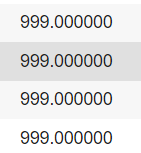

In [8]:
# ver si te tienen valores nulos
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f338a6c4450>,
      dtype=object)

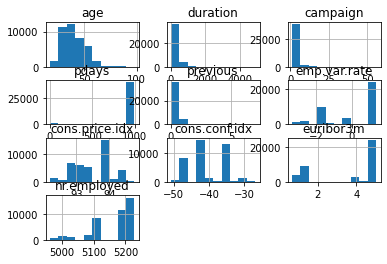

In [9]:
data.hist()

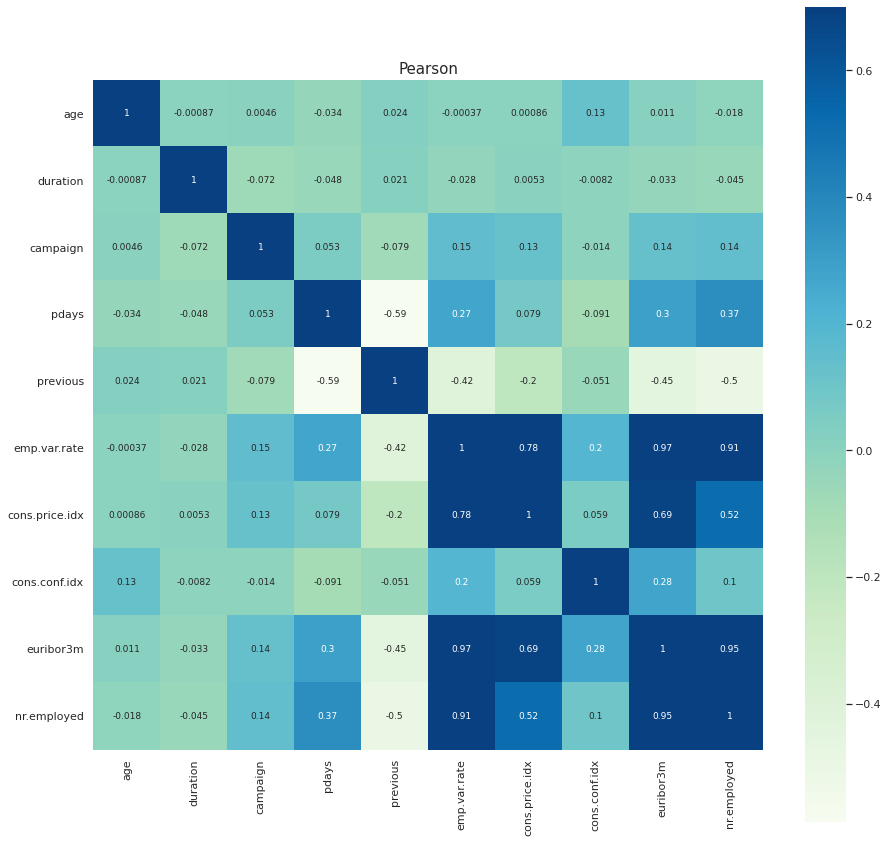

In [10]:
 # inicio de correlacion de pearson
 sns.set(style='whitegrid', font_scale=1)
 plt.figure(figsize=(15,15))
 plt.title('Pearson', fontsize=15)
 sns.heatmap(data.corr(),vmax=0.7, square=True,cmap='GnBu', linecolor='b',annot=True,annot_kws={"size":9})

In [15]:
# Analisis de componentes principales
x_aux = data.iloc[:,0:20]
x_aux = x_aux.drop(['pdays'],axis=1)
X = pd.get_dummies(x_aux)
y = data.iloc[:,20]

In [16]:
X

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [18]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [19]:
#Convierta la variable categórica en variables ficticias / indicadoras.
X.shape

(41188, 62)

In [20]:
y.shape

(41188,)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  uint8  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

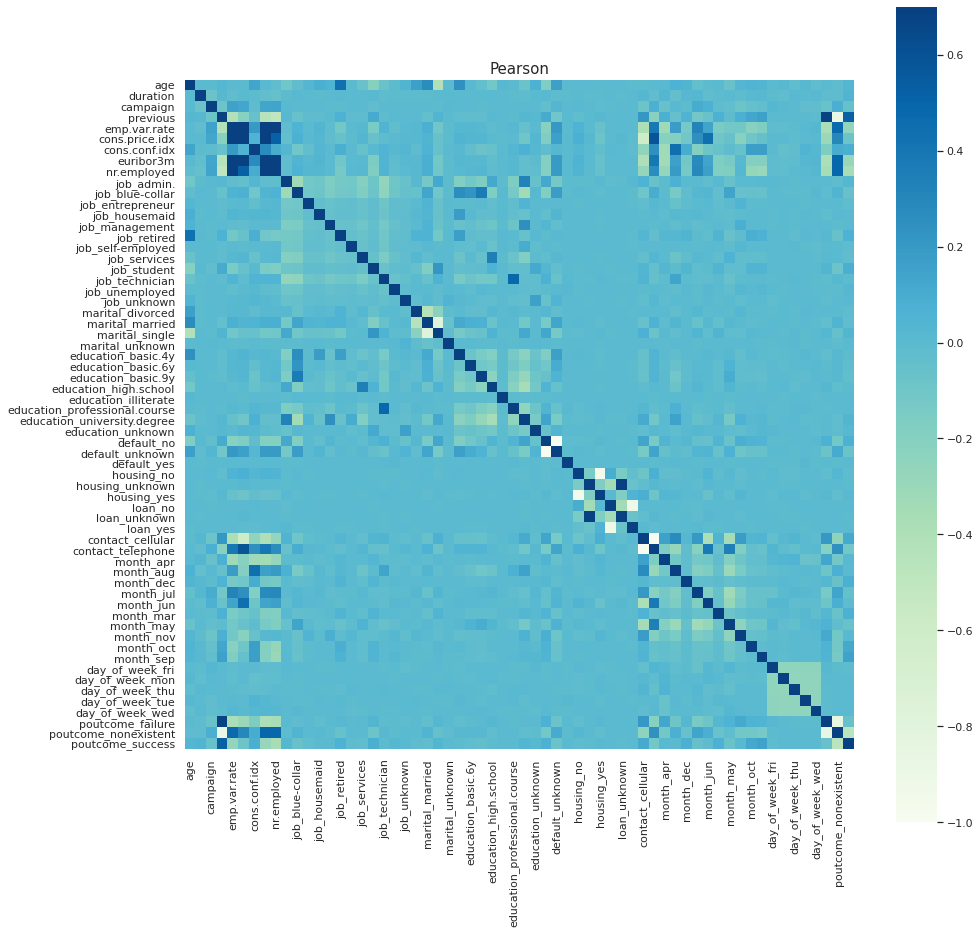

In [22]:
 # inicio de correlacion de pearson
 sns.set(style='whitegrid', font_scale=1)
 plt.figure(figsize=(15,15))
 plt.title('Pearson', fontsize=15)
 sns.heatmap(X.corr(),vmax=0.7, square=True,cmap='GnBu', linecolor='b',annot=False,annot_kws={"size":9})

In [ ]:
# analisis de componentes
# con mas categorias realizar reduccion de dimencionalidad


In [23]:
y.value_counts()
# no esta balanceado se va a ir siempre a negativo
# la especividad es baja
# depende del giro del negocio para hacer le balanceo hacia arriba o abajo o 50/50
# cuando y porque balancearla
# Siempre preguntando si es un beneficio o no esta sezgado si no que se esta mejorando para la empresa la presicion del modelo

no     36548
yes     4640
Name: y, dtype: int64

In [31]:
# no importa el modelo si no el que hacer con los datos
lenc = LabelEncoder()
y = lenc.fit_transform(y)

In [32]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X,y)
pd.Series(y_rus).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    4640
0    4640
dtype: int64

In [33]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X,y)
pd.Series(y_ros).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    36548
0    36548
dtype: int64

In [34]:
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X,y)
pd.Series(y_sm).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    36548
0    36548
dtype: int64

In [35]:
y_sm

array([0, 0, 0, ..., 1, 1, 1])

**FUNCIONES TrainTestSplit Scalado PCA**


In [37]:
def trainTestSplit(X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
  return X_train,X_test,y_train,y_test

def escalado(X_train,X_test):
  sc = StandardScaler()
  sc.fit(X_train)
  return sc.transform(X_train),sc.transform(X_test)

def generarPCA(n_componentes,X):
  pca = PCA(n_components=n_componentes)
  cp = pca.fit_transform(X)
  return pd.DataFrame(data=cp)

Sin escalado sin PCA sin balanceo

Sin escalado con PCA sin balanceo

Sin escalado sin PCA con balaceo Over

Sin escalado sin PCA con balaceo under

Sin escalado sin PCA con balaceo SMOTE

Sin escalado con PCA con balaceo Over

Sin escalado con PCA con balaceo SMOTE

Sin escalado con PCA con balaceo Under ANN

In [41]:
X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X_rus),y_rus)

In [42]:
model = Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy / categorical_crossentropy

In [43]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
26/26 [==============================] - 1s 8ms/step - loss: 11.6728 - accuracy: 0.6584 - val_loss: 7.5441 - val_accuracy: 0.6545
Epoch 2/30
26/26 [==============================] - 0s 3ms/step - loss: 5.0286 - accuracy: 0.6141 - val_loss: 3.0722 - val_accuracy: 0.5995
Epoch 3/30
26/26 [==============================] - 0s 2ms/step - loss: 1.9806 - accuracy: 0.6439 - val_loss: 0.9235 - val_accuracy: 0.6857
Epoch 4/30
26/26 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.7663 - val_loss: 0.4379 - val_accuracy: 0.8032
Epoch 5/30
26/26 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8417 - val_loss: 0.3964 - val_accuracy: 0.8398
Epoch 6/30
26/26 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.8441 - val_loss: 0.3758 - val_accuracy: 0.8459
Epoch 7/30
26/26 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8459 - val_loss: 0.3702 - val_accuracy: 0.8484
Epoch 8/30
26/26 [=

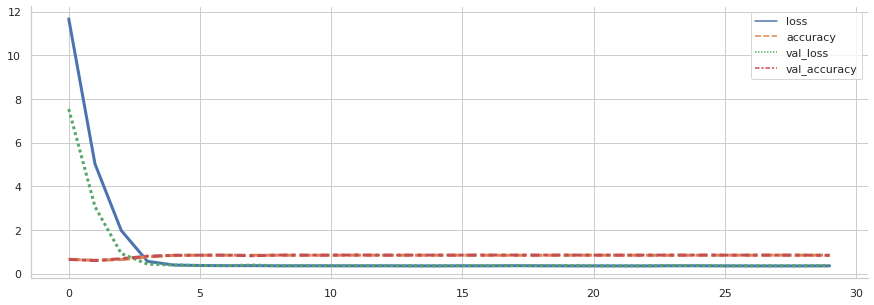

In [44]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Sin escalado sin PCA sin balanceo


In [45]:
X_train,X_test,y_train,y_test = trainTestSplit(X,y)

In [46]:
model = Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy / categorical_crossentropy

In [47]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
116/116 [==============================] - 1s 4ms/step - loss: 0.9092 - accuracy: 0.8780 - val_loss: 0.5030 - val_accuracy: 0.8611
Epoch 2/30
116/116 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8906 - val_loss: 0.2547 - val_accuracy: 0.8921
Epoch 3/30
116/116 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.8904 - val_loss: 0.2489 - val_accuracy: 0.8954
Epoch 4/30
116/116 [==============================] - 0s 2ms/step - loss: 0.2578 - accuracy: 0.8910 - val_loss: 0.2431 - val_accuracy: 0.8962
Epoch 5/30
116/116 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8922 - val_loss: 0.2469 - val_accuracy: 0.8912
Epoch 6/30
116/116 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.8972 - val_loss: 0.2382 - val_accuracy: 0.8965
Epoch 7/30
116/116 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.8998 - val_loss: 0.2125 - val_accuracy: 0.8992
Epoch 

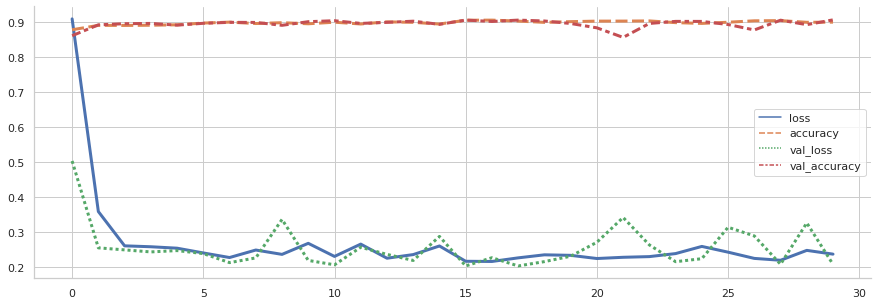

In [48]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Sin escalado con PCA sin balanceo


In [49]:
X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X),y)

In [50]:
model = Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy / categorical_crossentropy

In [51]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
116/116 [==============================] - 1s 3ms/step - loss: 3.5736 - accuracy: 0.7343 - val_loss: 0.4079 - val_accuracy: 0.8652
Epoch 2/30
116/116 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8690 - val_loss: 0.2764 - val_accuracy: 0.8783
Epoch 3/30
116/116 [==============================] - 0s 2ms/step - loss: 0.2588 - accuracy: 0.8812 - val_loss: 0.2523 - val_accuracy: 0.8812
Epoch 4/30
116/116 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8859 - val_loss: 0.2475 - val_accuracy: 0.8869
Epoch 5/30
116/116 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8892 - val_loss: 0.2654 - val_accuracy: 0.8722
Epoch 6/30
116/116 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.8906 - val_loss: 0.2415 - val_accuracy: 0.8891
Epoch 7/30
116/116 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.8960 - val_loss: 0.2409 - val_accuracy: 0.8901
Epoch 

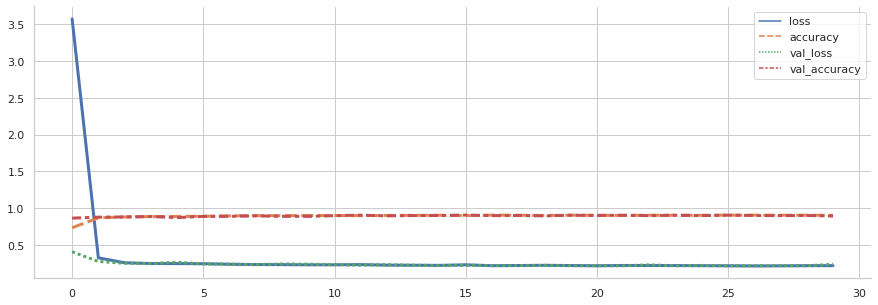

In [52]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Sin escalado sin PCA con balaceo Over


In [53]:
X_train,X_test,y_train,y_test = trainTestSplit(X_ros,y_ros)

In [54]:
model = Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy / categorical_crossentropy

In [55]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
205/205 [==============================] - 1s 3ms/step - loss: 21.5566 - accuracy: 0.7170 - val_loss: 0.3743 - val_accuracy: 0.8461
Epoch 2/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8393 - val_loss: 0.3570 - val_accuracy: 0.8506
Epoch 3/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8442 - val_loss: 0.3856 - val_accuracy: 0.8223
Epoch 4/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8469 - val_loss: 0.3452 - val_accuracy: 0.8495
Epoch 5/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8488 - val_loss: 0.3274 - val_accuracy: 0.8737
Epoch 6/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8479 - val_loss: 0.3305 - val_accuracy: 0.8587
Epoch 7/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8562 - val_loss: 0.4015 - val_accuracy: 0.8523
Epoch

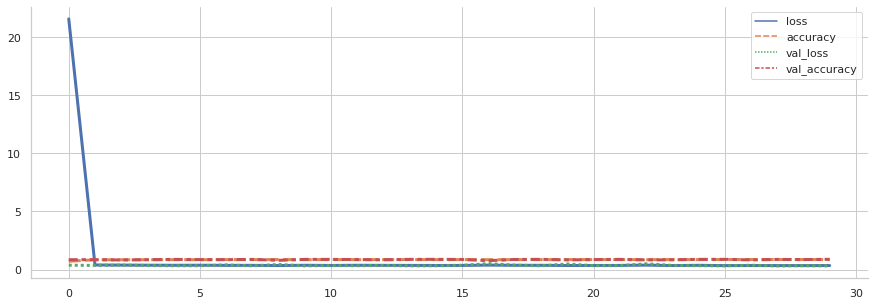

In [56]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Sin escalado sin PCA con balaceo under


In [57]:
X_train,X_test,y_train,y_test = trainTestSplit(X_rus, y_rus)

In [58]:
model = Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy / categorical_crossentropy

In [59]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
26/26 [==============================] - 1s 8ms/step - loss: 577.9030 - accuracy: 0.4995 - val_loss: 325.6128 - val_accuracy: 0.5011
Epoch 2/30
26/26 [==============================] - 0s 3ms/step - loss: 186.7711 - accuracy: 0.4995 - val_loss: 96.4510 - val_accuracy: 0.5011
Epoch 3/30
26/26 [==============================] - 0s 3ms/step - loss: 34.8917 - accuracy: 0.5697 - val_loss: 0.9192 - val_accuracy: 0.7364
Epoch 4/30
26/26 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.6228 - val_loss: 0.6601 - val_accuracy: 0.7123
Epoch 5/30
26/26 [==============================] - 0s 2ms/step - loss: 0.6419 - accuracy: 0.6967 - val_loss: 0.6632 - val_accuracy: 0.7277
Epoch 6/30
26/26 [==============================] - 0s 3ms/step - loss: 0.6316 - accuracy: 0.6978 - val_loss: 0.6453 - val_accuracy: 0.7001
Epoch 7/30
26/26 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.6997 - val_loss: 0.6402 - val_accuracy: 0.7119
Epoch 8/30
2

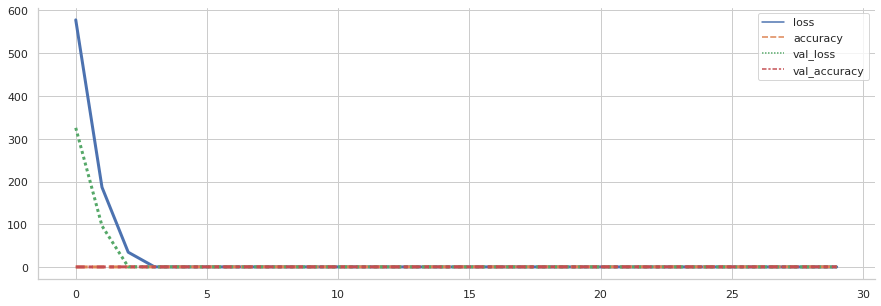

In [60]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()


Sin escalado sin PCA con balaceo SMOTE


In [61]:
X_train,X_test,y_train,y_test = trainTestSplit(X_sm, y_sm)

In [62]:
model = Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy / categorical_crossentropy

In [63]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
205/205 [==============================] - 1s 2ms/step - loss: 96.2608 - accuracy: 0.6193 - val_loss: 0.5779 - val_accuracy: 0.7978
Epoch 2/30
205/205 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8076 - val_loss: 0.3951 - val_accuracy: 0.8556
Epoch 3/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8437 - val_loss: 0.3827 - val_accuracy: 0.8359
Epoch 4/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8500 - val_loss: 0.3574 - val_accuracy: 0.8455
Epoch 5/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3721 - accuracy: 0.8496 - val_loss: 0.3412 - val_accuracy: 0.8718
Epoch 6/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8588 - val_loss: 0.3343 - val_accuracy: 0.8718
Epoch 7/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8418 - val_loss: 0.3629 - val_accuracy: 0.8694
Epoch

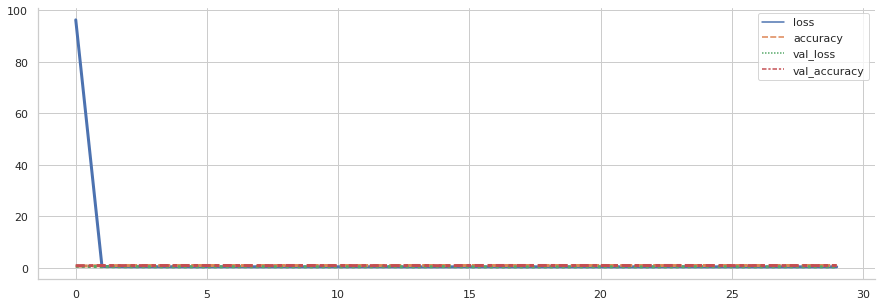

In [64]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()


Sin escalado con PCA con balaceo Over



In [65]:
X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X_ros),y_ros)

In [66]:
model = Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy / categorical_crossentropy

In [67]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
205/205 [==============================] - 1s 2ms/step - loss: 2.8323 - accuracy: 0.7023 - val_loss: 0.3722 - val_accuracy: 0.8466
Epoch 2/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8506 - val_loss: 0.3621 - val_accuracy: 0.8510
Epoch 3/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8520 - val_loss: 0.3608 - val_accuracy: 0.8501
Epoch 4/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3495 - accuracy: 0.8519 - val_loss: 0.3571 - val_accuracy: 0.8506
Epoch 5/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8514 - val_loss: 0.3588 - val_accuracy: 0.8507
Epoch 6/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3480 - accuracy: 0.8513 - val_loss: 0.3555 - val_accuracy: 0.8509
Epoch 7/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8512 - val_loss: 0.3566 - val_accuracy: 0.8520
Epoch 

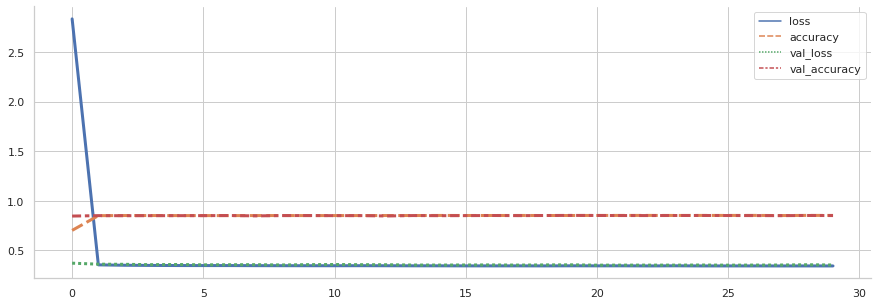

In [68]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()

Sin escalado con PCA con balaceo SMOTE

In [69]:
X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X_sm),y_sm)

In [70]:
model = Sequential()
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy / categorical_crossentropy

In [71]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
205/205 [==============================] - 1s 4ms/step - loss: 11.0788 - accuracy: 0.7434 - val_loss: 0.5483 - val_accuracy: 0.8488
Epoch 2/30
205/205 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8421 - val_loss: 0.3962 - val_accuracy: 0.8359
Epoch 3/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.8432 - val_loss: 0.3682 - val_accuracy: 0.8471
Epoch 4/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3671 - accuracy: 0.8480 - val_loss: 0.3617 - val_accuracy: 0.8440
Epoch 5/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8500 - val_loss: 0.3609 - val_accuracy: 0.8519
Epoch 6/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8504 - val_loss: 0.3654 - val_accuracy: 0.8494
Epoch 7/30
205/205 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8517 - val_loss: 0.3576 - val_accuracy: 0.8479
Epoch

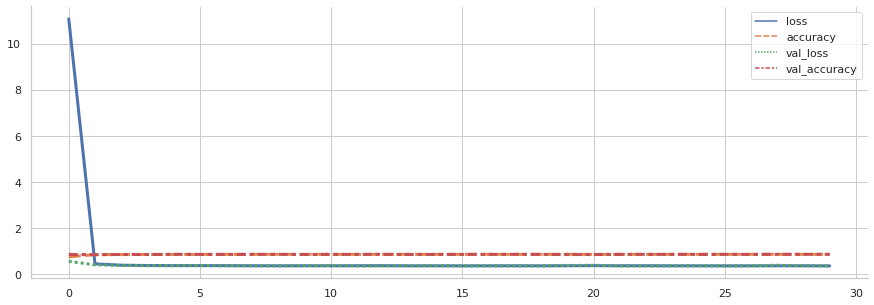

In [72]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss,lw=3)
sns.despine()